# Problem Statement
A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. 

## Business Goal 

You are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market. 

We need to understand that which variables are affecting hence we need to execute the multiple regression model on the dataset.

The Steps we will follow in this exercise

1. Reading and understanding the data.
2. Preparing the data for modelling (train-test split, rescaling,etc)
3. Training the model
4. Residual analysis
5. Predictions and evaluation on the test set.

# Step 1: Reading and understanding the data
Let us import Numpy and Pandas to read the housing dataset

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [85]:
#read the data for the car set
car = pd.read_csv("CarPrice_Assignment.csv")
car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [86]:
car.shape

(205, 26)

In [87]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [88]:
car.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [89]:
# separating the car company and the model name:

# new data frame with split value columns 
new = car["CarName"].str.split(" ", n = 1, expand = True) 
  
# making separate first name column from new data frame 
car["Company"]= new[0] 
  
# making separate last name column from new data frame 
car["Model"]= new[1] 
  
# Dropping old Name columns 
car.drop(columns =["CarName"], inplace = True) 
car.head()
  

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Company,Model
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,giulia
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,stelvio
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,Quadrifoglio
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,...,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,100 ls
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,...,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,100ls


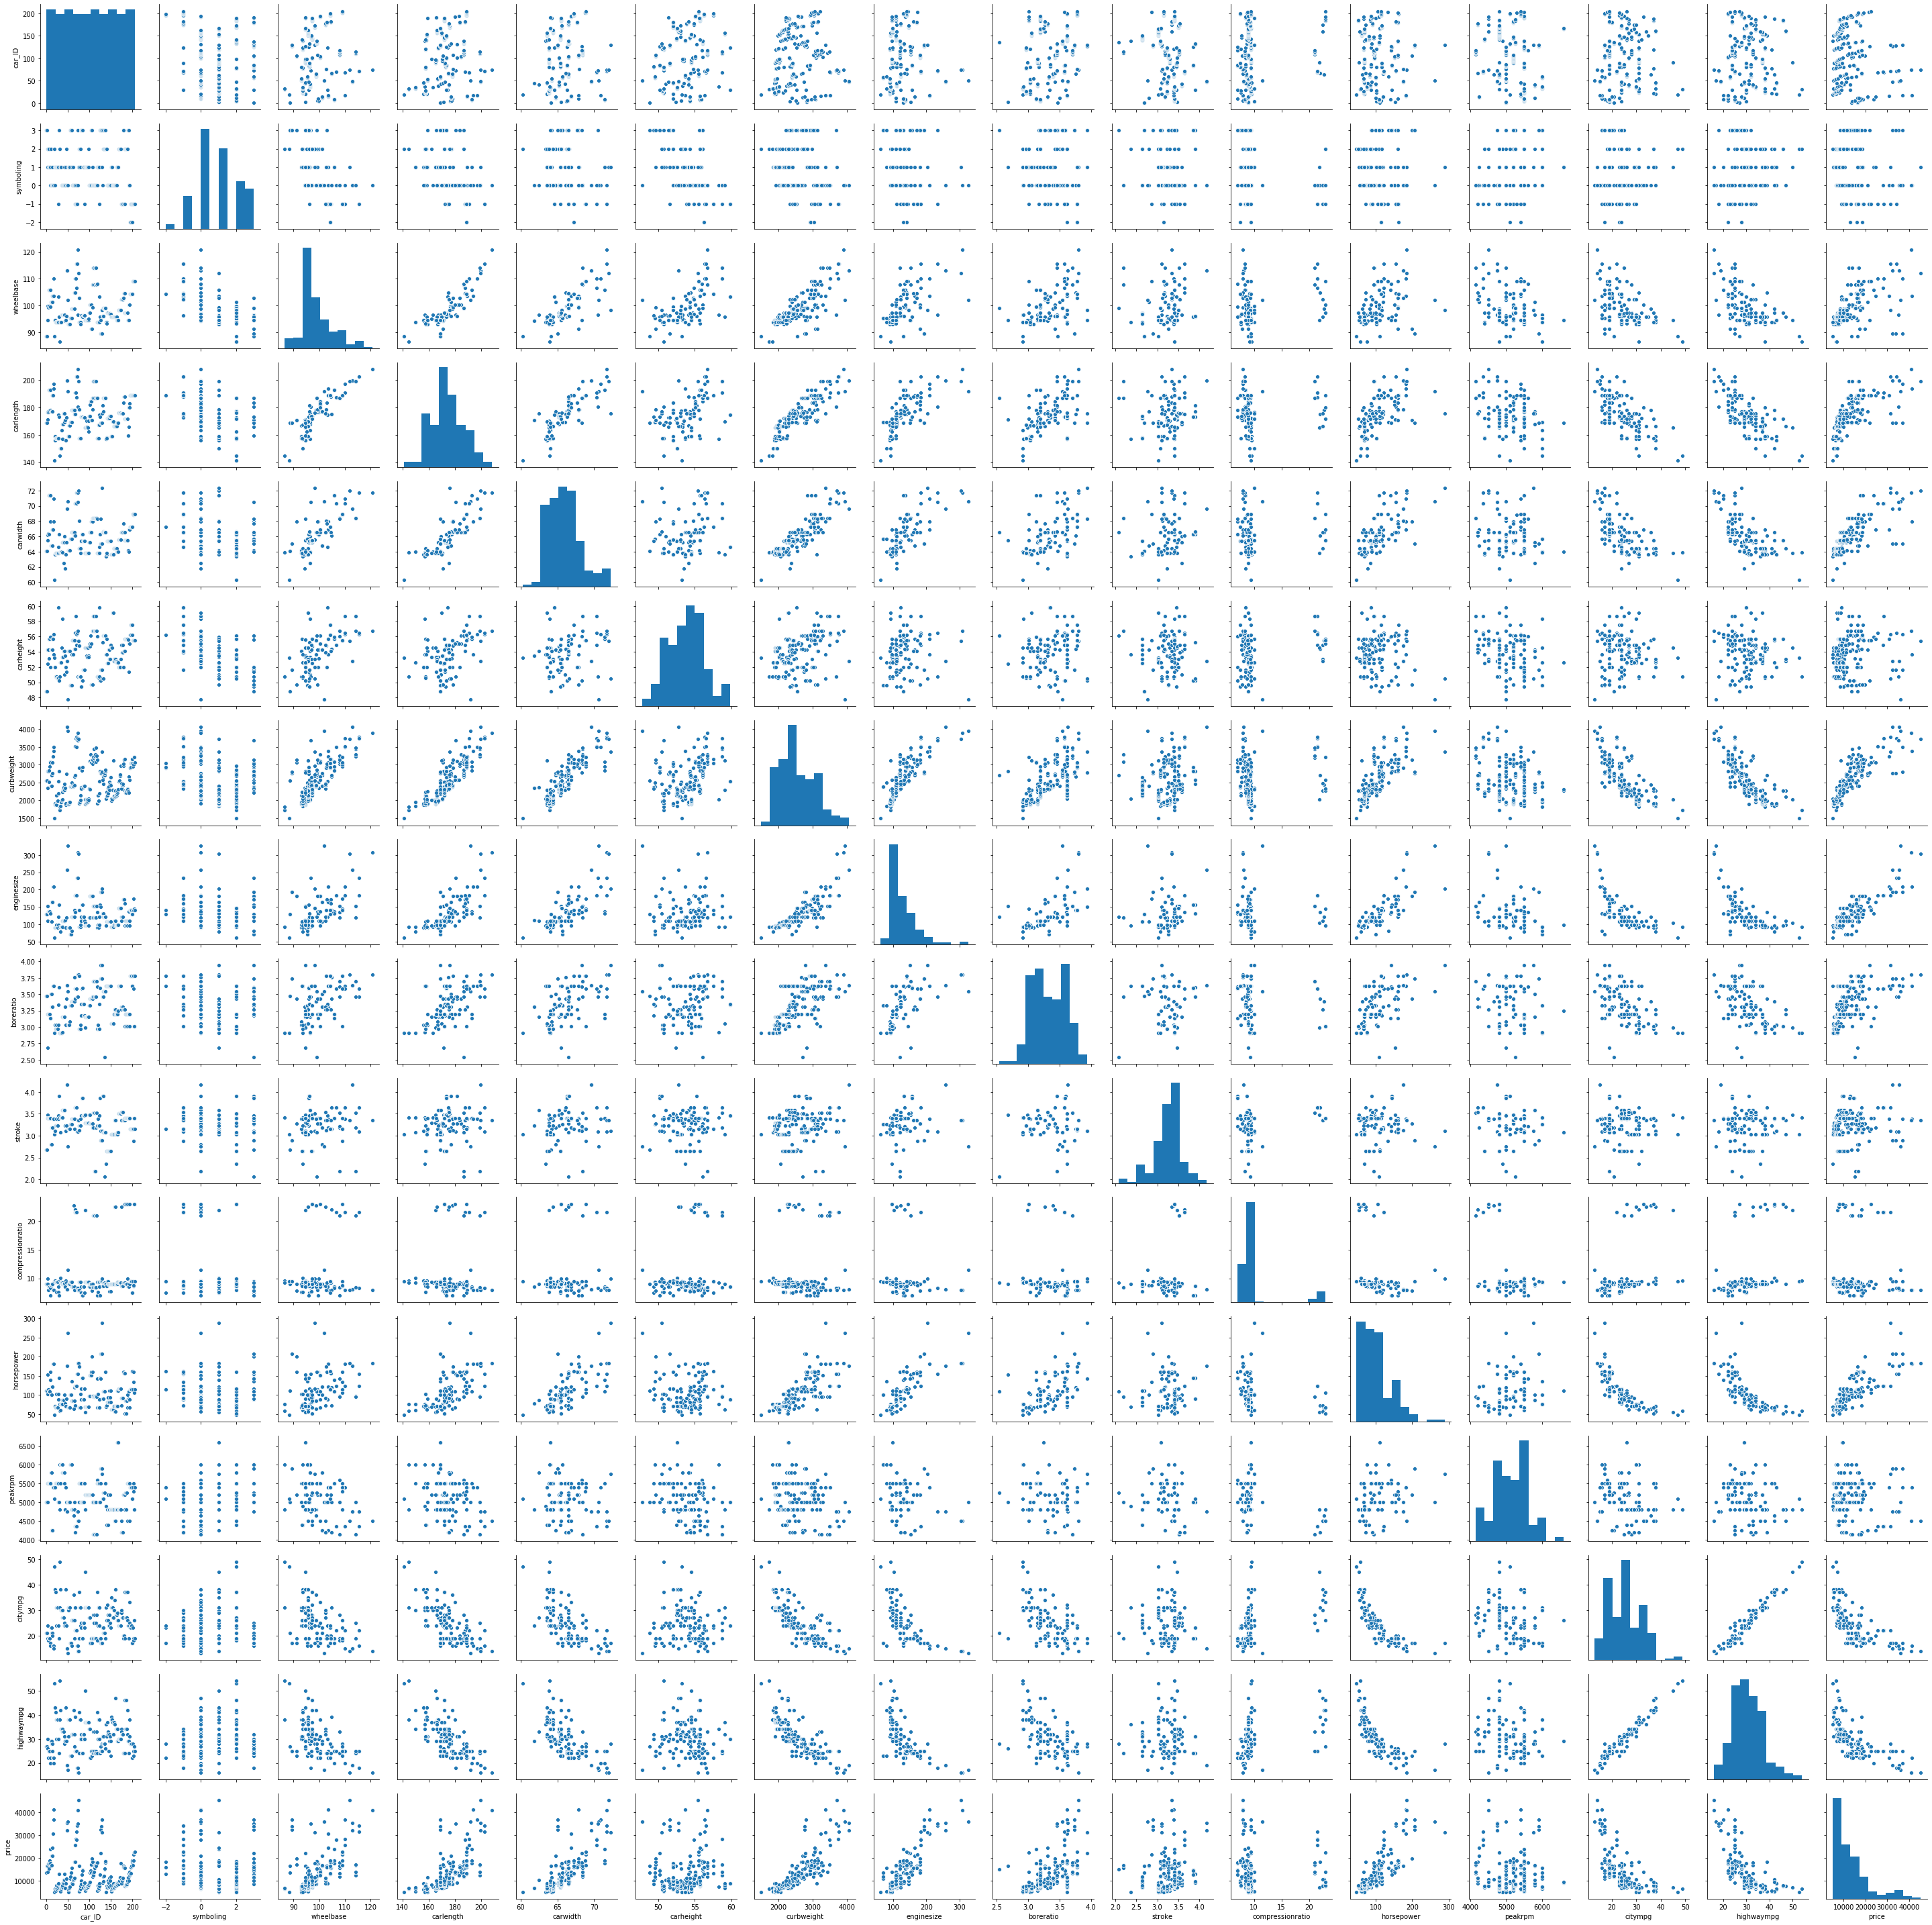

In [90]:
# visualising numeric variables

sns.pairplot(car)
plt.show()

In [91]:
# dictinary = car_ID	symboling	CarName	fueltype	aspiration	doornumber	carbody	drivewheel	enginelocation	wheelbase	...	enginesize	fuelsystem	boreratio	stroke	compressionratio	horsepower	peakrpm	citympg	highwaympg	price

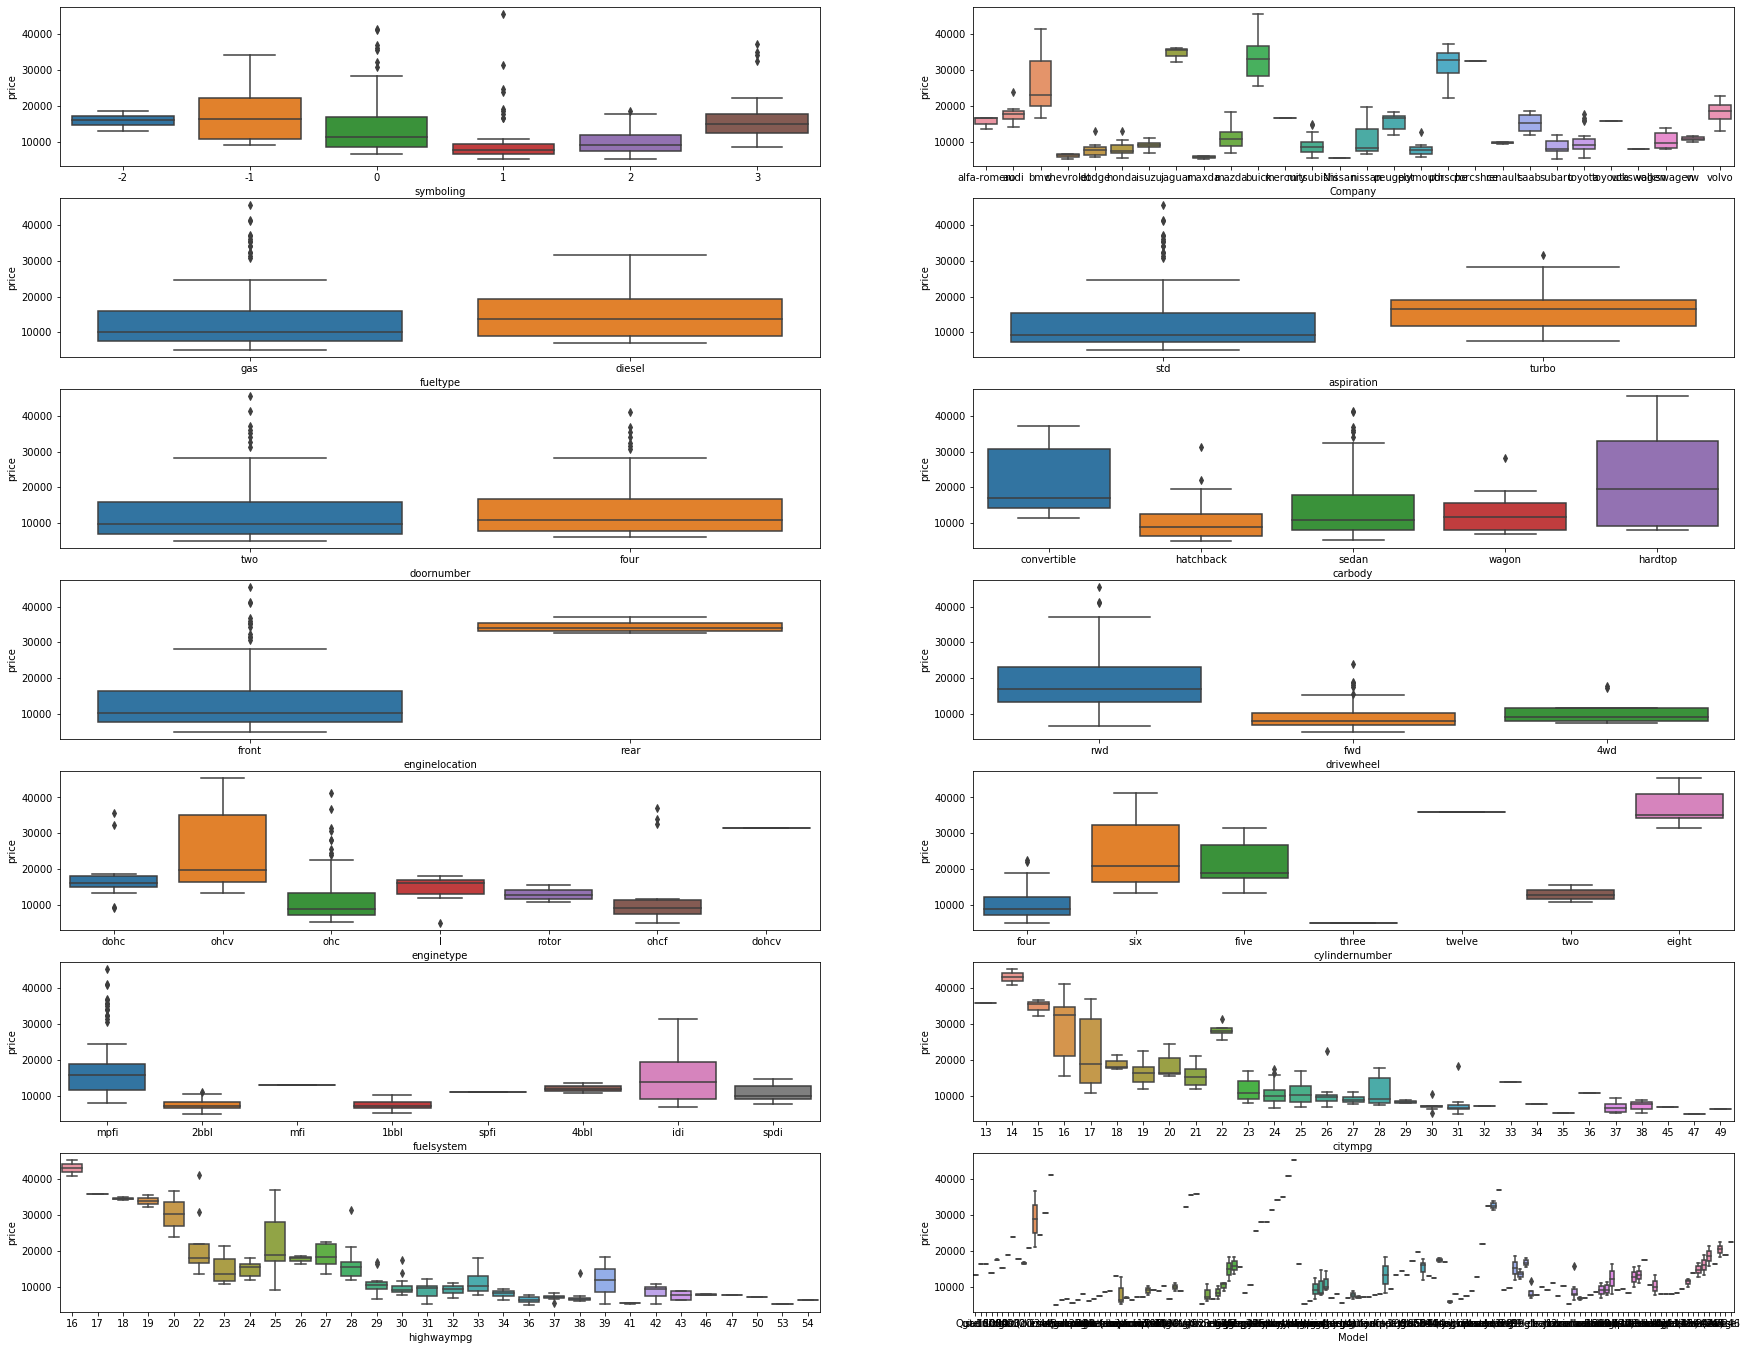

In [92]:
# visualising categorical variables
plt.figure(figsize =(30,24))
plt.subplot(7,2,1)
sns.boxplot (x='symboling', y='price', data = car)
plt.subplot(7,2,2)
sns.boxplot(x = 'Company', y = 'price', data = car)
plt.subplot(7,2,3)
sns.boxplot(x = 'fueltype', y = 'price', data = car)
plt.subplot(7,2,4)
sns.boxplot(x = 'aspiration', y = 'price', data = car)
plt.subplot(7,2,5)
sns.boxplot(x = 'doornumber', y = 'price', data = car)
plt.subplot(7,2,6)
sns.boxplot(x = 'carbody', y = 'price', data = car)
plt.subplot(7,2,7)
sns.boxplot(x = 'enginelocation', y = 'price', data = car)
plt.subplot(7,2,8)
sns.boxplot(x = 'drivewheel', y = 'price', data = car)
plt.subplot(7,2,9)
sns.boxplot(x = 'enginetype', y = 'price', data = car)
plt.subplot(7,2,10)
sns.boxplot(x = 'cylindernumber', y = 'price', data = car)
plt.subplot(7,2,11)
sns.boxplot(x = 'fuelsystem', y = 'price', data = car)
plt.subplot(7,2,12)
sns.boxplot(x = 'citympg', y = 'price', data = car)
plt.subplot(7,2,13)
sns.boxplot(x = 'highwaympg', y = 'price', data = car)
plt.subplot(7,2,14)
sns.boxplot(x = 'Model', y = 'price', data = car)


plt.show()

# Step 2: Preparing the data for modelling
- Encoding:
    - Converting Binary vars to 1/0
    - Other categorical vars to dummy vars.

- Splitting into train and test
- Rescaling of variables

In [93]:
car.symboling.value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

In [94]:
car.Company.value_counts()

toyota         31
nissan         17
mazda          15
mitsubishi     13
honda          13
subaru         12
volvo          11
peugeot        11
dodge           9
volkswagen      9
bmw             8
buick           8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
jaguar          3
alfa-romero     3
chevrolet       3
vw              2
renault         2
maxda           2
Nissan          1
porcshce        1
toyouta         1
vokswagen       1
mercury         1
Name: Company, dtype: int64

In [95]:
car.fueltype.value_counts()

gas       185
diesel     20
Name: fueltype, dtype: int64

In [96]:
car.aspiration.value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

In [97]:
car.doornumber.value_counts()

four    115
two      90
Name: doornumber, dtype: int64

In [98]:
car.carbody.value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64

In [99]:
car.enginelocation.value_counts()

front    202
rear       3
Name: enginelocation, dtype: int64

In [100]:
car.drivewheel.value_counts()

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

In [101]:
car.enginetype.value_counts()

ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: enginetype, dtype: int64

In [102]:
car.cylindernumber.value_counts()

four      159
six        24
five       11
eight       5
two         4
twelve      1
three       1
Name: cylindernumber, dtype: int64

In [103]:
car.citympg.value_counts()

31    28
19    27
24    22
27    14
17    13
26    12
23    12
21     8
30     8
25     8
38     7
28     7
37     6
16     6
22     4
15     3
18     3
29     3
20     3
14     2
49     1
47     1
32     1
33     1
34     1
35     1
36     1
45     1
13     1
Name: citympg, dtype: int64

In [104]:
car.highwaympg.value_counts()

25    19
24    17
38    17
30    16
32    16
34    14
37    13
28    13
29    10
33     9
31     8
22     8
23     7
27     5
43     4
41     3
42     3
26     3
20     2
19     2
18     2
16     2
36     2
39     2
46     2
47     2
53     1
50     1
17     1
54     1
Name: highwaympg, dtype: int64

In [105]:
car.Model.value_counts()

corolla                  6
corona                   6
504                      6
dl                       4
mirage g4                3
                        ..
panamera                 1
satellite custom (sw)    1
super beetle             1
skyhawk                  1
otti                     1
Name: Model, Length: 141, dtype: int64

##  Dummy variables

In [106]:
car =pd.get_dummies(car,columns=['symboling'],prefix=['symboling'],drop_first = True)

In [107]:
car =pd.get_dummies(car,columns=['Company'],prefix=['Company'],drop_first = True)


In [108]:
car =pd.get_dummies(car,columns=['fueltype'],prefix=['fueltype'],drop_first = True)


In [109]:
car =pd.get_dummies(car,columns=['aspiration'],prefix=['aspiration'],drop_first = True)


In [110]:
car =pd.get_dummies(car,columns=['doornumber'],prefix=['doornumber'],drop_first = True)


In [111]:
car =pd.get_dummies(car,columns=['carbody'],prefix=['carbody'],drop_first = True)


In [112]:
car =pd.get_dummies(car,columns=['drivewheel'],prefix=['drivewheel'],drop_first = True)


In [113]:
car =pd.get_dummies(car,columns=['enginelocation'],prefix=['enginelocation'],drop_first = True)


In [114]:
car =pd.get_dummies(car,columns=['enginetype'],prefix=['enginetype'],drop_first = True)


In [115]:
car =pd.get_dummies(car,columns=['cylindernumber'],prefix=['cylindernumber'],drop_first = True)


In [116]:
car =pd.get_dummies(car,columns=['fuelsystem'],prefix=['fuelsystem'],drop_first = True)


In [117]:
car.head()

,car_ID,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,1,0,0
1,2,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,1,0,0
2,3,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,...,0,0,0,0,0,0,0,1,0,0
3,4,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,...,0,0,0,0,0,0,0,1,0,0
4,5,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,...,0,0,0,0,0,0,0,1,0,0


## Splitting into train and test data set 


In [118]:
df_train , df_test = train_test_split (car, train_size = 0.7, random_state = 100)

print(df_train.shape)
print(df_test.shape)

(143, 77)
(62, 77)


## Rescaling the features : To keep the coefficients comparable

1. Min- Max scaling.(Between 0 and 1)
2. Standardisation (mean -0 , Sigma -1) 

In [119]:
# x
# Min max scaling or normalisation: (x-xmin)/ (xmax- xmin)

#Steps : Fit and transform on Train data set
# 1. Instantiate an object
scaler = MinMaxScaler()

# create a list of numeric vars
num_vars = ['wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke','compressionratio','horsepower'
           ,'peakrpm','citympg','highwaympg']

#2. Fit on data
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

C:\Users\DELL-PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
C:\Users\DELL-PC\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,car_ID,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
122,123,0.244828,0.426016,0.291667,0.265487,0.272692,0.139623,0.230159,0.525253,0.15000,...,0,0,0,1,0,0,0,0,0,0
125,126,0.272414,0.452033,0.666667,0.212389,0.500388,0.339623,1.000000,0.464646,0.15625,...,0,0,0,0,0,0,0,1,0,0
166,167,0.272414,0.448780,0.308333,0.424779,0.314973,0.139623,0.444444,0.449495,0.15000,...,0,0,0,0,0,0,0,1,0,0
1,2,0.068966,0.450407,0.316667,0.088496,0.411171,0.260377,0.626984,0.247475,0.12500,...,0,0,0,0,0,0,0,1,0,0
199,200,0.610345,0.775610,0.575000,0.858407,0.647401,0.260377,0.746032,0.484848,0.03125,...,0,0,0,0,0,0,0,1,0,0


In [120]:
#fit() : learns xmax, xmin ( NOte: Its perfomred only on the train set)
# transform() : computes x- xmin / xmax -xmin  
# fit_transform()

# Step 3 : Training the Model

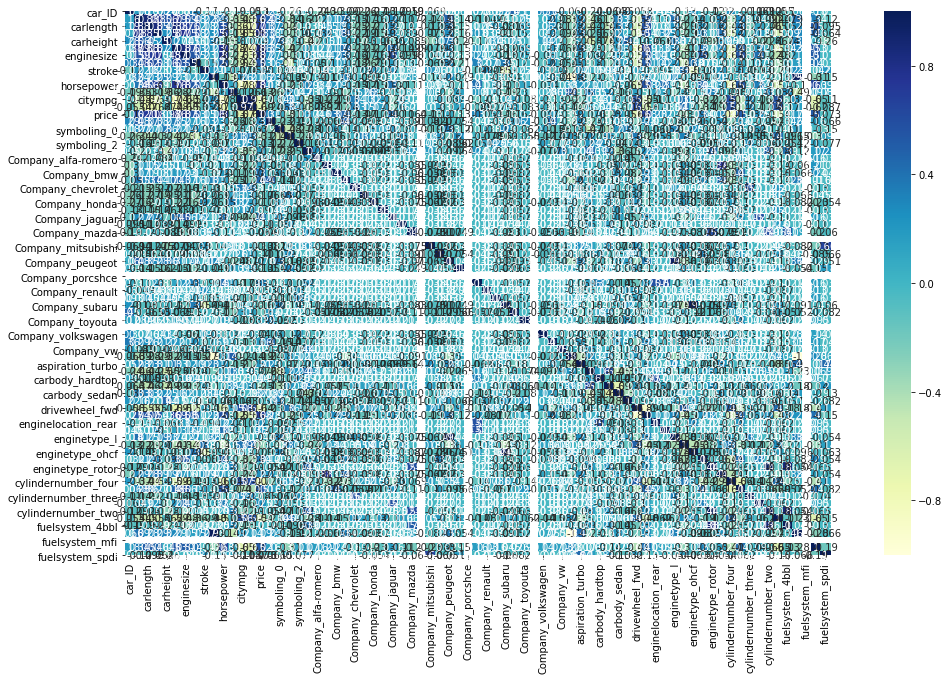

In [121]:
# heatmap 
plt.figure(figsize =(16,10))
sns.heatmap(df_train.corr(), annot =True , cmap = "YlGnBu")
plt.show()

## Method  : Taking all variables at once and dropping the insignificant ones.

In [122]:
car.columns

Index(['car_ID', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price', 'Model',
       'symboling_-1', 'symboling_0', 'symboling_1', 'symboling_2',
       'symboling_3', 'Company_alfa-romero', 'Company_audi', 'Company_bmw',
       'Company_buick', 'Company_chevrolet', 'Company_dodge', 'Company_honda',
       'Company_isuzu', 'Company_jaguar', 'Company_maxda', 'Company_mazda',
       'Company_mercury', 'Company_mitsubishi', 'Company_nissan',
       'Company_peugeot', 'Company_plymouth', 'Company_porcshce',
       'Company_porsche', 'Company_renault', 'Company_saab', 'Company_subaru',
       'Company_toyota', 'Company_toyouta', 'Company_vokswagen',
       'Company_volkswagen', 'Company_volvo', 'Company_vw', 'fueltype_gas',
       'aspiration_turbo', 'doornumber_two', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'd

In [124]:
# X_train , y_train

y_train = df_train.pop('price')
X_train = df_train


In [128]:
# build a model with all the variables
X_train_sm = sm.add_constant(X_train)


# create  model

lr = sm.OLS(y_train, X_train_sm)

# fit 

lr_model = lr.fit()

# params


ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [129]:
lr_model.summary()

NameError: name 'lr_model' is not defined

## Checking VIF
Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating VIF is:

𝑉𝐼𝐹𝑖=11−𝑅𝑖2 ¶

In [130]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

TypeError: '>=' not supported between instances of 'str' and 'NoneType'

We could have :
- High P value and High VIF ( Drop it anyhow )
- High P values and Low VIP  : Remove these first
- Low P value and High VIF  : Remove these after the onces above
- Low P value and Low VIF.
